# Calculate Alpha Diversity

**Study Area:** University of Tartu, Estonia (26.72E, 58.20N to 26.86E, 58.31N)  
**Data:** Sentinel-2 L2A EOPF Zarr  
**Objective:** Calculate spectral diversity as a biodiversity indicator

## Background
Spectral diversity from satellite imagery serves as a proxy for ecosystem biodiversity (Thouverai et al. 2021, Tassi et al. 2022).

**References:**
- [stdiversity](https://github.com/RossiBz/stdiversity) | [Paper](https://doi.org/10.1016/j.ecolind.2021.108106)
- [spectralrao-monitoring](https://github.com/AndreaTassi23/spectralrao-monitoring) | [Paper](https://doi.org/10.1016/j.compag.2022.106861)

**Team:** Alex, Justus, Andy: https://github.com/LandscapeGeoinformatics/EOPF-Zarr-BIDS25

In [1]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
import pystac_client
import xarray as xr

In [2]:
xr.set_options(display_expand_attrs=False)

Query EOPF STAC with low cloud cover

In [3]:
# (26.7212871883497414,58.2029953574183310 : 26.8649178809289140,58.308324531976389)

catalog = pystac_client.Client.open("https://stac.core.eopf.eodc.eu")
items = list(
    catalog.search(
        collections=["sentinel-2-l2a"],
        bbox=[26.7212871883497414,58.2029953574183310, 
              26.8649178809289140,58.308324531976389],
        datetime=["2025-05-30", "2025-08-01"],
        query={
            "eo:cloud_cover": {
                "lt": 10
            },  # Cloud cover < 20% 
        },
    ).items()
)
items

[<Item id=S2A_MSIL2A_20250614T094051_N0511_R036_T35VME_20250614T113015>,
 <Item id=S2B_MSIL2A_20250614T093029_N0511_R136_T35VME_20250614T113630>,
 <Item id=S2A_MSIL2A_20250604T094121_N0511_R036_T35VME_20250604T112305>,
 <Item id=S2B_MSIL2A_20250604T093029_N0511_R136_T35VME_20250604T122431>]

In [4]:
item = items[0]
item.assets["product"]

<Asset href=https://objects.eodc.eu:443/e05ab01a9d56408d82ac32d69a5aae2a:202506-s02msil2a/14/products/cpm_v256/S2A_MSIL2A_20250614T094051_N0511_R036_T35VME_20250614T113015.zarr>

In [5]:
item

<Item id=S2A_MSIL2A_20250614T094051_N0511_R036_T35VME_20250614T113015>

Open a single EOPF Zarr product in Xarray

In [6]:
dt = xr.open_datatree(
    item.assets["product"].href,
    **item.assets["product"].extra_fields["xarray:open_datatree_kwargs"]
)
dt

<xarray.DataTree>
Group: /
│   Attributes: (2)
├── Group: /conditions
│   ├── Group: /conditions/geometry
│   │       Dimensions:                        (angle: 2, band: 13, y: 23, x: 23,
│   │                                           detector: 6)
│   │       Coordinates:
│   │         * angle                          (angle) <U7 56B 'zenith' 'azimuth'
│   │         * band                           (band) <U3 156B 'b01' 'b02' ... 'b11' 'b12'
│   │         * detector                       (detector) int64 48B 6 7 8 9 10 11
│   │         * x                              (x) int64 184B 399960 404960 ... 509960
│   │         * y                              (y) int64 184B 6500040 6495040 ... 6390040
│   │       Data variables:
│   │           mean_sun_angles                (angle) float64 16B dask.array<chunksize=(2,), meta=np.ndarray>
│   │           mean_viewing_incidence_angles  (band, angle) float64 208B dask.array<chunksize=(13, 2), meta=np.ndarray>
│   │           sun_angles                     (angle, y, x) float64 8kB dask.array<chunksize=(2, 23, 23), meta=np.ndarray>
│   │           viewing_incidence_angles       (band, detector, angle, y, x) float64 660kB dask.array<chunksize=(7, 3, 2, 23, 23), meta=np.ndarray>
│   ├── Group: /conditions/mask
│   │   ├── Group: /conditions/mask/detector_footprint
│   │   │   ├── Group: /conditions/mask/detector_footprint/r10m
│   │   │   │       Dimensions:  (y: 10980, x: 10980)
│   │   │   │       Coordinates:
│   │   │   │         * x        (x) int64 88kB 399965 399975 399985 399995 ... 509735 509745 509755
│   │   │   │         * y        (y) int64 88kB 6500035 6500025 6500015 ... 6390265 6390255 6390245
│   │   │   │       Data variables:
│   │   │   │           b02      (y, x) uint8 121MB dask.array<chunksize=(10980, 10980), meta=np.ndarray>
│   │   │   │           b03      (y, x) uint8 121MB dask.array<chunksize=(10980, 10980), meta=np.ndarray>
│   │   │   │           b04      (y, x) uint8 121MB dask.array<chunksize=(10980, 10980), meta=np.ndarray>
│   │   │   │           b08      (y, x) uint8 121MB dask.array<chunksize=(10980, 10980), meta=np.ndarray>
│   │   │   ├── Group: /conditions/mask/detector_footprint/r20m
│   │   │   │       Dimensions:  (y: 5490, x: 5490)
│   │   │   │       Coordinates:
│   │   │   │         * x        (x) int64 44kB 399970 399990 400010 400030 ... 509710 509730 509750
│   │   │   │         * y        (y) int64 44kB 6500030 6500010 6499990 ... 6390290 6390270 6390250
│   │   │   │       Data variables:
│   │   │   │           b05      (y, x) uint8 30MB dask.array<chunksize=(5490, 5490), meta=np.ndarray>
│   │   │   │           b06      (y, x) uint8 30MB dask.array<chunksize=(5490, 5490), meta=np.ndarray>
│   │   │   │           b07      (y, x) uint8 30MB dask.array<chunksize=(5490, 5490), meta=np.ndarray>
│   │   │   │           b11      (y, x) uint8 30MB dask.array<chunksize=(5490, 5490), meta=np.ndarray>
│   │   │   │           b12      (y, x) uint8 30MB dask.array<chunksize=(5490, 5490), meta=np.ndarray>
│   │   │   │           b8a      (y, x) uint8 30MB dask.array<chunksize=(5490, 5490), meta=np.ndarray>
│   │   │   └── Group: /conditions/mask/detector_footprint/r60m
│   │   │           Dimensions:  (y: 1830, x: 1830)
│   │   │           Coordinates:
│   │   │             * x        (x) int64 15kB 399990 400050 400110 400170 ... 509610 509670 509730
│   │   │             * y        (y) int64 15kB 6500010 6499950 6499890 ... 6390390 6390330 6390270
│   │   │           Data variables:
│   │   │               b01      (y, x) uint8 3MB dask.array<chunksize=(1830, 1830), meta=np.ndarray>
│   │   │               b09      (y, x) uint8 3MB dask.array<chunksize=(1830, 1830), meta=np.ndarray>
│   │   │               b10      (y, x) uint8 3MB dask.array<chunksize=(1830, 1830), meta=np.ndarray>
│   │   ├── Group: /conditions/mask/l1c_classification
│   │   │   └── Group: /conditions/mask/l1c_classification/r60m
│   │   │           Dimensions:  (y: 1830, x: 18

Take 20m reflectance product

In [7]:
ds = dt.measurements.reflectance.r20m.to_dataset()
ds

<xarray.Dataset> Size: 2GB
Dimensions:  (y: 5490, x: 5490)
Coordinates:
  * x        (x) int64 44kB 399970 399990 400010 400030 ... 509710 509730 509750
  * y        (y) int64 44kB 6500030 6500010 6499990 ... 6390290 6390270 6390250
Data variables:
    b01      (y, x) float64 241MB dask.array<chunksize=(5490, 5490), meta=np.ndarray>
    b02      (y, x) float64 241MB dask.array<chunksize=(5490, 5490), meta=np.ndarray>
    b03      (y, x) float64 241MB dask.array<chunksize=(5490, 5490), meta=np.ndarray>
    b04      (y, x) float64 241MB dask.array<chunksize=(5490, 5490), meta=np.ndarray>
    b05      (y, x) float64 241MB dask.array<chunksize=(5490, 5490), meta=np.ndarray>
    b06      (y, x) float64 241MB dask.array<chunksize=(5490, 5490), meta=np.ndarray>
    b07      (y, x) float64 241MB dask.array<chunksize=(5490, 5490), meta=np.ndarray>
    b11      (y, x) float64 241MB dask.array<chunksize=(5490, 5490), meta=np.ndarray>
    b12      (y, x) float64 241MB dask.array<chunksize=(5490, 5490), meta=np.ndarray>
    b8a      (y, x) float64 241MB dask.array<chunksize=(5490, 5490), meta=np.ndarray>

In [ ]:
# 

In [8]:
da = ds[['b04', 'b03','b02']].to_dataarray(dim="band")

In [9]:
da

<xarray.DataArray (band: 3, y: 5490, x: 5490)> Size: 723MB
dask.array<stack, shape=(3, 5490, 5490), dtype=float64, chunksize=(1, 5490, 5490), chunktype=numpy.ndarray>
Coordinates:
  * x        (x) int64 44kB 399970 399990 400010 400030 ... 509710 509730 509750
  * y        (y) int64 44kB 6500030 6500010 6499990 ... 6390290 6390270 6390250
  * band     (band) object 24B 'b04' 'b03' 'b02'

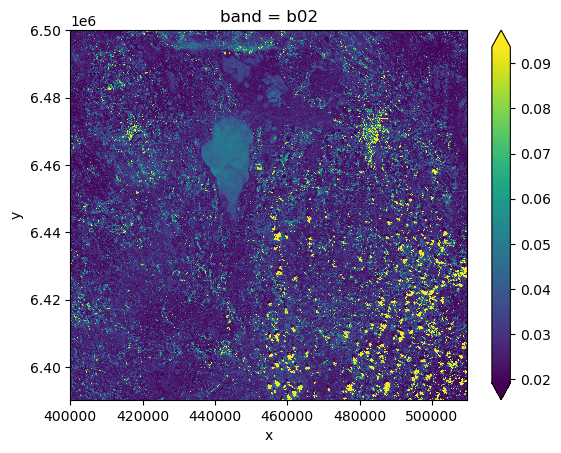

In [10]:
da.isel(band=2).plot.imshow(cmap="viridis",robust=True)

In [11]:
def normalisation_str_gm(band_array, p_min, p_max, gamma_val):

    # Calculate min and max values based on percentiles for stretching
    min_val = np.percentile(band_array[band_array > 0], p_min) if np.any(band_array > 0) else 0
    max_val = np.percentile(band_array[band_array > 0], p_max) if np.any(band_array > 0) else 1

    # Avoid division by zero if min_val equals max_val
    if max_val == min_val:
        stretched_band = np.zeros_like(band_array, dtype=np.float32)
    else:
        # Linear stretch to 0-1 range
        stretched_band = (band_array - min_val) / (max_val - min_val)

    # Clip values to ensure they are within [0, 1] after stretching
    stretched_band[stretched_band < 0] = 0
    stretched_band[stretched_band > 1] = 1

    # Apply gamma correction
    gamma_corrected_band = np.power(stretched_band, 1.0 / gamma_val)

    # Returns the corrected array:
    return gamma_corrected_band

In [12]:
# Input: percentile range for contrast stretching
contrast_stretch_percentile=(2, 98)
# Input: gamma correction value
gamma=1.8


In [13]:
from shapely.geometry import box
import geopandas as gpd

bbox = box(26.7212871883497414,58.2029953574183310 ,26.8649178809289140,58.308324531976389)

utm_box = gpd.GeoDataFrame( {'geometry': [bbox]}, crs=4326).to_crs(32635)

In [14]:
utm_bounds = utm_box.loc[0].geometry.bounds

In [15]:
small = ds.sel(x=slice(utm_bounds[0], utm_bounds[2]), y=slice(utm_bounds[3], utm_bounds[1]))
small

<xarray.Dataset> Size: 20MB
Dimensions:  (y: 588, x: 423)
Coordinates:
  * x        (x) int64 3kB 483630 483650 483670 483690 ... 492030 492050 492070
  * y        (y) int64 5kB 6463070 6463050 6463030 ... 6451370 6451350 6451330
Data variables:
    b01      (y, x) float64 2MB dask.array<chunksize=(588, 423), meta=np.ndarray>
    b02      (y, x) float64 2MB dask.array<chunksize=(588, 423), meta=np.ndarray>
    b03      (y, x) float64 2MB dask.array<chunksize=(588, 423), meta=np.ndarray>
    b04      (y, x) float64 2MB dask.array<chunksize=(588, 423), meta=np.ndarray>
    b05      (y, x) float64 2MB dask.array<chunksize=(588, 423), meta=np.ndarray>
    b06      (y, x) float64 2MB dask.array<chunksize=(588, 423), meta=np.ndarray>
    b07      (y, x) float64 2MB dask.array<chunksize=(588, 423), meta=np.ndarray>
    b11      (y, x) float64 2MB dask.array<chunksize=(588, 423), meta=np.ndarray>
    b12      (y, x) float64 2MB dask.array<chunksize=(588, 423), meta=np.ndarray>
    b8a      (y, x) float64 2MB dask.array<chunksize=(588, 423), meta=np.ndarray>

In [16]:
# small_da = small[['b04', 'b03','b02']].to_dataarray(dim="band")

Text(0.5, 1.0, 'RGB Composite')

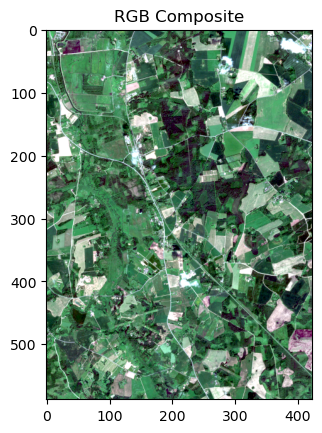

In [17]:
tc_red = "b04"
tc_green = "b03"
tc_blue = "b02"

# The tc_red, tc_green, and tc_blue variables are inputs specifying the band names
red = small[tc_red]
gre = small[tc_green]
blu = small[tc_blue]

# The tc_red, tc_green, and tc_blue variables are inputs specifying the band names
red = small[tc_red].values
gre = small[tc_green].values
blu = small[tc_blue].values

# Apply normalisation to the red, green and blue bands using the specified percentile and gamma values
red_processed = normalisation_str_gm(red, *contrast_stretch_percentile, gamma)
green_processed = normalisation_str_gm(gre, *contrast_stretch_percentile, gamma)
blue_processed = normalisation_str_gm(blu, *contrast_stretch_percentile, gamma)

# We stack the processed red, green, and blue arrays
rgb_composite_sm = np.dstack((red_processed, green_processed, blue_processed)).astype(np.float32)

plt.imshow(rgb_composite_sm)
plt.title('RGB Composite')

In [27]:
windowed = small.to_dataarray(dim="band").compute().rolling(x=3, y=3).construct({"x": "x_window", "y": "y_window"})
windowed

<xarray.DataArray (band: 10, y: 588, x: 423, x_window: 3, y_window: 3)> Size: 179MB
array([[[[[   nan,    nan,    nan],
          [   nan,    nan,    nan],
          [   nan,    nan, 0.0583]],

         [[   nan,    nan,    nan],
          [   nan,    nan, 0.0583],
          [   nan,    nan, 0.0566]],

         [[   nan,    nan, 0.0583],
          [   nan,    nan, 0.0566],
          [   nan,    nan, 0.0515]],

         ...,

         [[   nan,    nan, 0.0195],
          [   nan,    nan, 0.0199],
          [   nan,    nan, 0.0202]],

         [[   nan,    nan, 0.0199],
          [   nan,    nan, 0.0202],
...
          [0.2554, 0.3184, 0.415 ],
          [0.2518, 0.3658, 0.446 ]],

         [[0.2554, 0.3184, 0.415 ],
          [0.2518, 0.3658, 0.446 ],
          [0.3213, 0.3679, 0.4366]],

         ...,

         [[0.286 , 0.284 , 0.2661],
          [0.2766, 0.2684, 0.2676],
          [0.2844, 0.2908, 0.3219]],

         [[0.2766, 0.2684, 0.2676],
          [0.2844, 0.2908, 0.3219],
          [0.3979, 0.4047, 0.3535]],

         [[0.2844, 0.2908, 0.3219],
          [0.3979, 0.4047, 0.3535],
          [0.5356, 0.4312, 0.3468]]]]])
Coordinates:
  * x        (x) int64 3kB 483630 483650 483670 483690 ... 492030 492050 492070
  * y        (y) int64 5kB 6463070 6463050 6463030 ... 6451370 6451350 6451330
  * band     (band) object 80B 'b01' 'b02' 'b03' 'b04' ... 'b11' 'b12' 'b8a'
Dimensions without coordinates: x_window, y_window

In [35]:
%%time

def pairwise_distances(data):
    import itertools

    x = np.reshape(data, (data.shape[0], -1))
    window = x.shape[-1]
    distances = np.array([
        np.linalg.norm(x[:, first] - x[:, second])
        for first, second in itertools.combinations(range(x.shape[1]), 2)
    ])
    
    return np.nansum(distances * 2 / window ** 4)

result = xr.apply_ufunc(pairwise_distances, windowed, input_core_dims=[["band", "x_window", "y_window"]], output_core_dims=[[]], vectorize=True, dask="parallelized")
result

CPU times: user 33.2 s, sys: 11.8 ms, total: 33.2 s
Wall time: 33.2 s


<xarray.DataArray (y: 588, x: 423)> Size: 2MB
array([[0.00000000e+00, 1.37610443e-05, 8.41229008e-05, ...,
        1.36229032e-04, 1.00126088e-04, 1.84385735e-04],
       [2.54906649e-05, 1.86380069e-04, 5.15363920e-04, ...,
        4.24527860e-04, 3.75397188e-04, 6.61377188e-04],
       [1.55477479e-04, 6.77790773e-04, 1.65719543e-03, ...,
        8.88746768e-04, 7.67877234e-04, 1.33404613e-03],
       ...,
       [4.96173140e-05, 2.09028400e-04, 6.60846366e-04, ...,
        3.35443036e-04, 1.18848398e-03, 2.16670177e-03],
       [7.66861035e-05, 4.42694262e-04, 1.10711275e-03, ...,
        3.55654490e-04, 1.28655532e-03, 2.01588998e-03],
       [1.71541447e-04, 7.64314043e-04, 1.65274759e-03, ...,
        3.59370916e-04, 1.14986269e-03, 1.69842580e-03]])
Coordinates:
  * x        (x) int64 3kB 483630 483650 483670 483690 ... 492030 492050 492070
  * y        (y) int64 5kB 6463070 6463050 6463030 ... 6451370 6451350 6451330

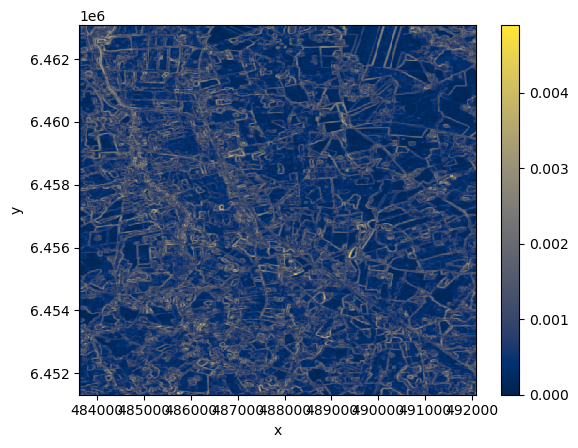

In [36]:
ax = result.plot.imshow(cmap="cividis")
fig = ax.figure
fig.savefig("alpha_div_test.png", format="png")